## Classification on the [dataset of Titanic](https://github.com/codebasics/py/blob/master/ML/14_naive_bayes/titanic.csv).
by [Zahra Taheri](https://github.com/zahta) (23 May 2020)

##### Import libraries

In [1]:
#For some basic operations
import numpy as np
import pandas as pd

#For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import dabl

##### Reading the dataset

In [2]:
#1) Download the dataset by URL and use it directly
#url='https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/titanic.csv'
#data1 = pd.read_csv(url)

#Write downloaded dataset to a csv file
#data1.to_csv('assignments-8.csv')

#2) Read and prepare downloaded data from PC
data2=pd.read_csv('titanic.csv')
data=data2.drop(data2.columns[0],axis=1)
print(data.shape)

(891, 12)


In [3]:
data.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


## Descriptive statistics and data visualizations

In [4]:
#Describe the dataset

data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [5]:
#Check the no. of unique items in each categorical column

data.select_dtypes('object').nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [6]:
# Percentage of missing data in each column

number_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/number_of_columns
print(percentage_of_missing_data)

PassengerId    0.000000
Name           0.000000
Pclass         0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
Survived       0.000000
dtype: float64


Target looks like classification
Linear Discriminant Analysis training set score: 0.589


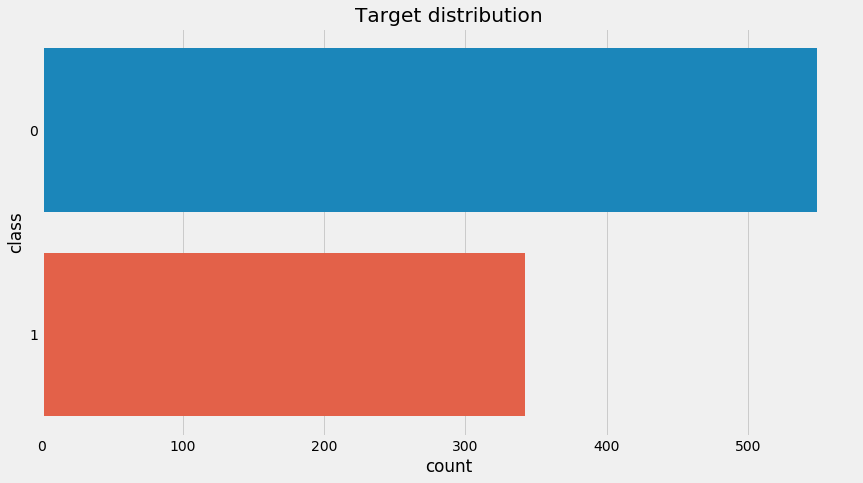

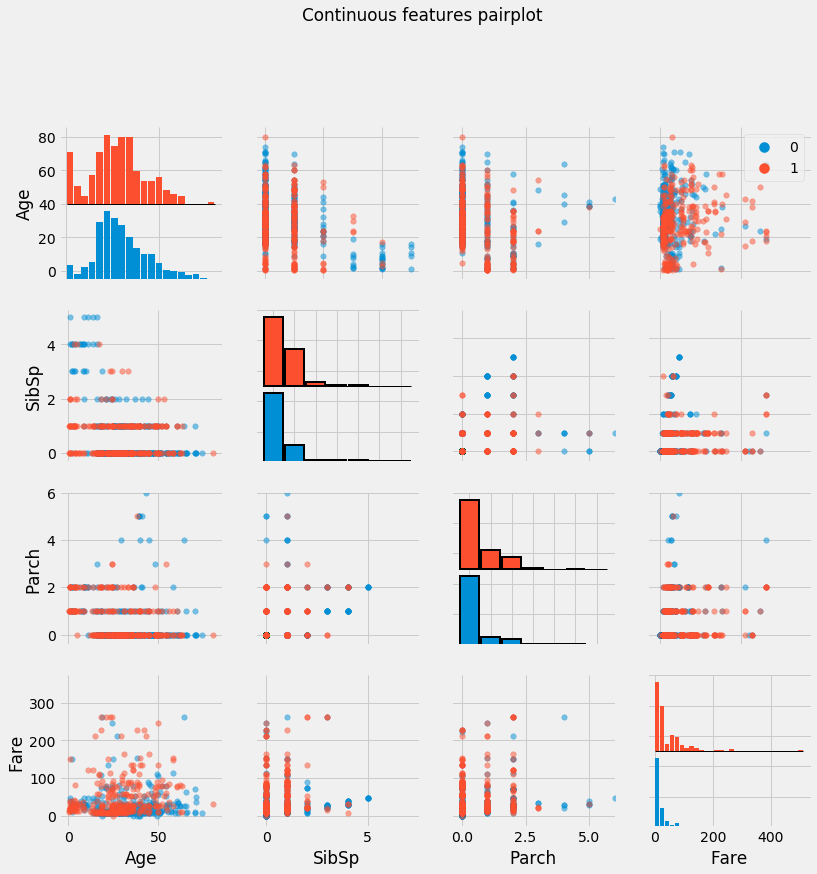

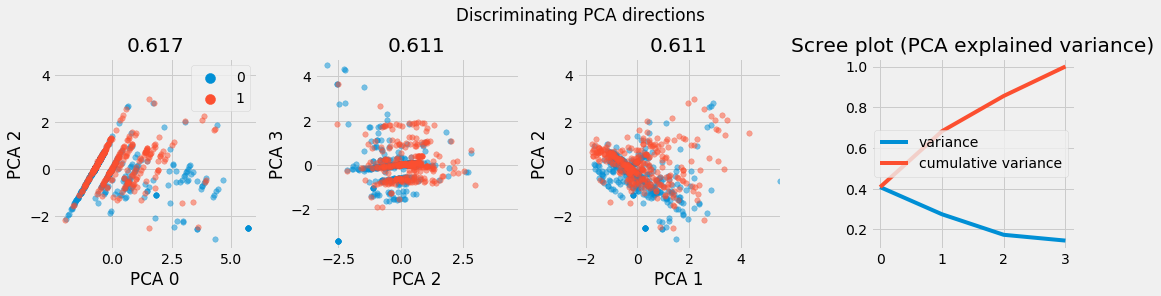

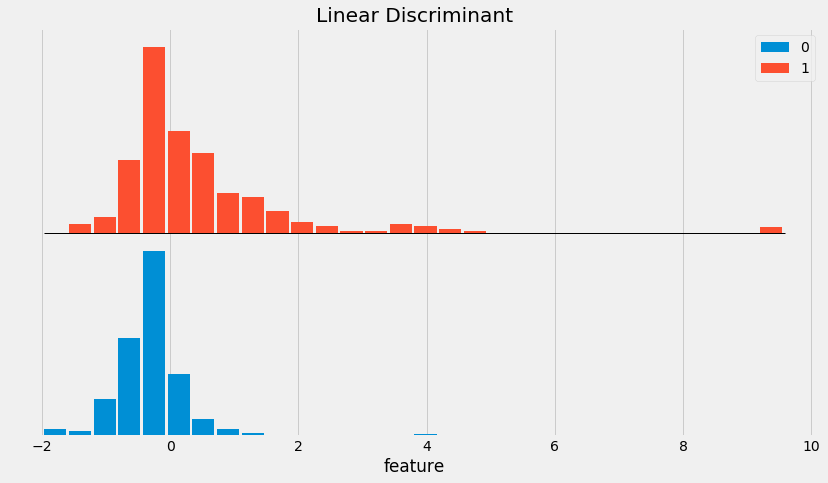

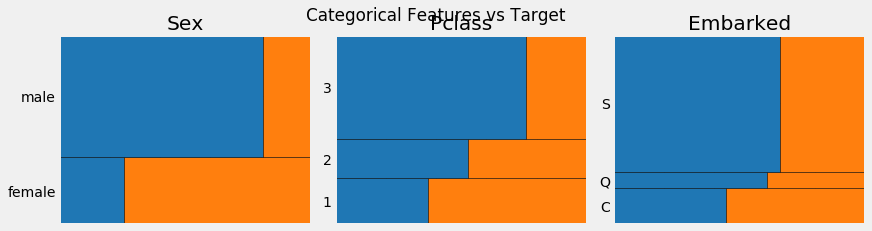

In [7]:
#Comparison of all other attributes with respect to Survived column

plt.rcParams['figure.figsize'] = (13,7)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'Survived')

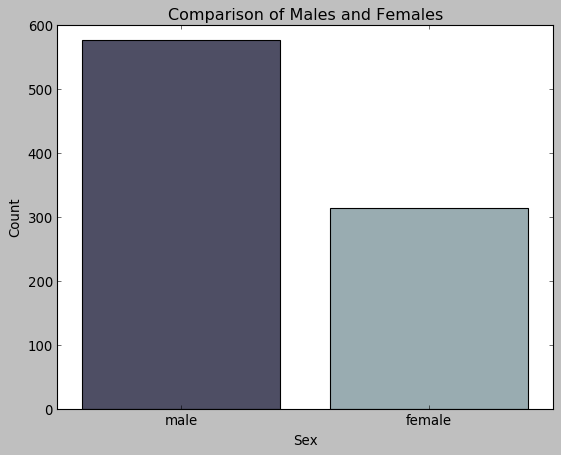

In [8]:
#Visualising the number of male and female in the dataset

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('_classic_test')
sns.countplot(data['Sex'], palette = 'bone')
plt.title('Comparison of Males and Females', fontweight = 30)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

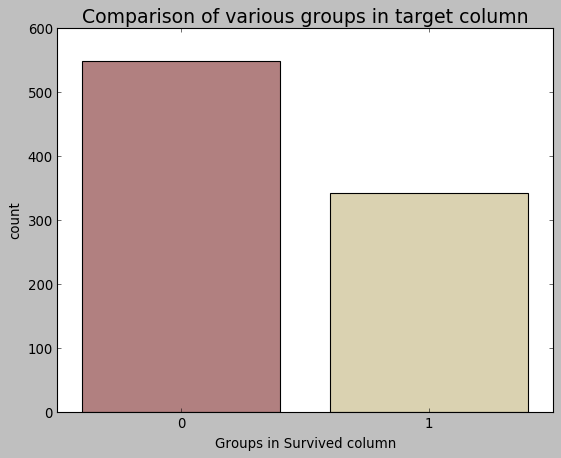

In [9]:
#Visualizing the different groups in the target

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('_classic_test')
sns.countplot(data['Survived'], palette = 'pink')
plt.title('Comparison of various groups in target column', fontweight = 30, fontsize = 17)
plt.xlabel('Groups in Survived column')
plt.ylabel('count')
plt.show()

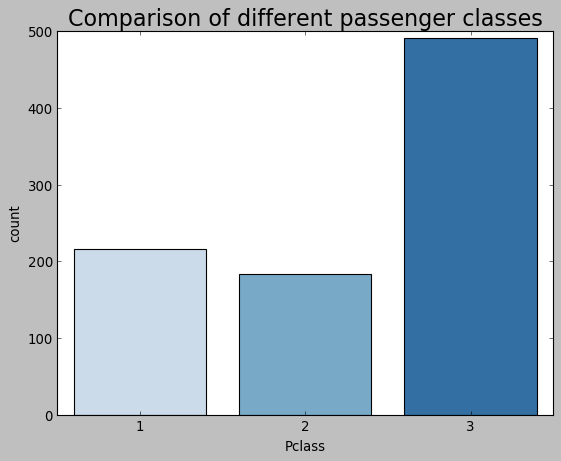

In [10]:
#Visualizing the different Pclass (Passenger Class)

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('_classic_test')
sns.countplot(data['Pclass'], palette = 'Blues')
plt.title('Comparison of different passenger classes', fontweight = 30, fontsize = 20)
plt.xlabel('Pclass')
plt.ylabel('count')
plt.show()

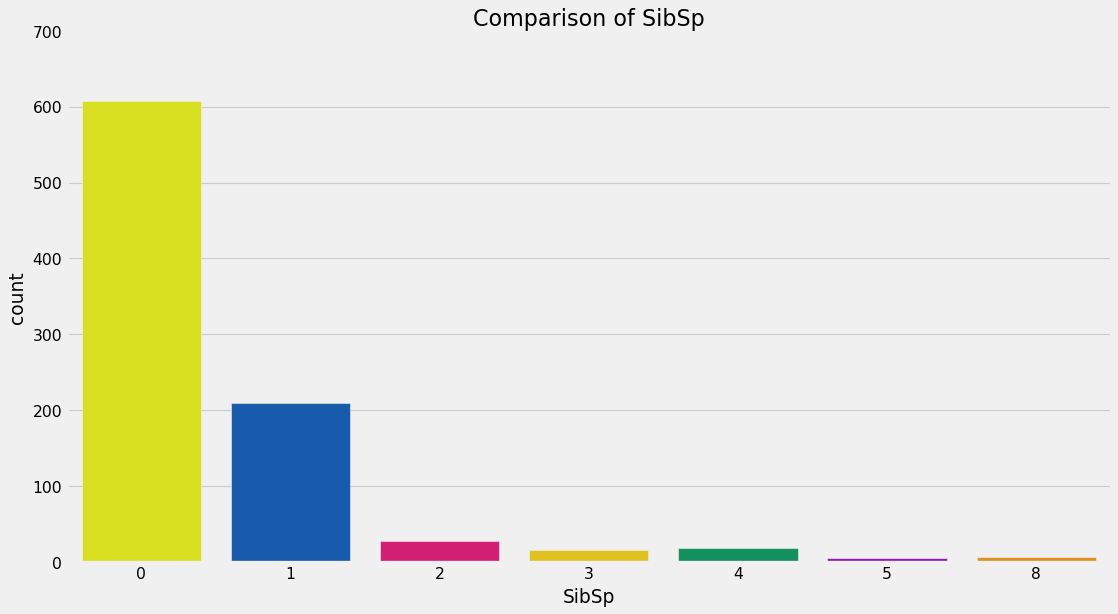

In [11]:
#Visualizing the different SibSp (Number of Siblings/Spouses Aboard)

plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('fivethirtyeight')
sns.countplot(data['SibSp'], palette = 'prism')
plt.title('Comparison of SibSp', fontweight = 30, fontsize = 20)
plt.xlabel('SibSp')
plt.ylabel('count')
plt.show()

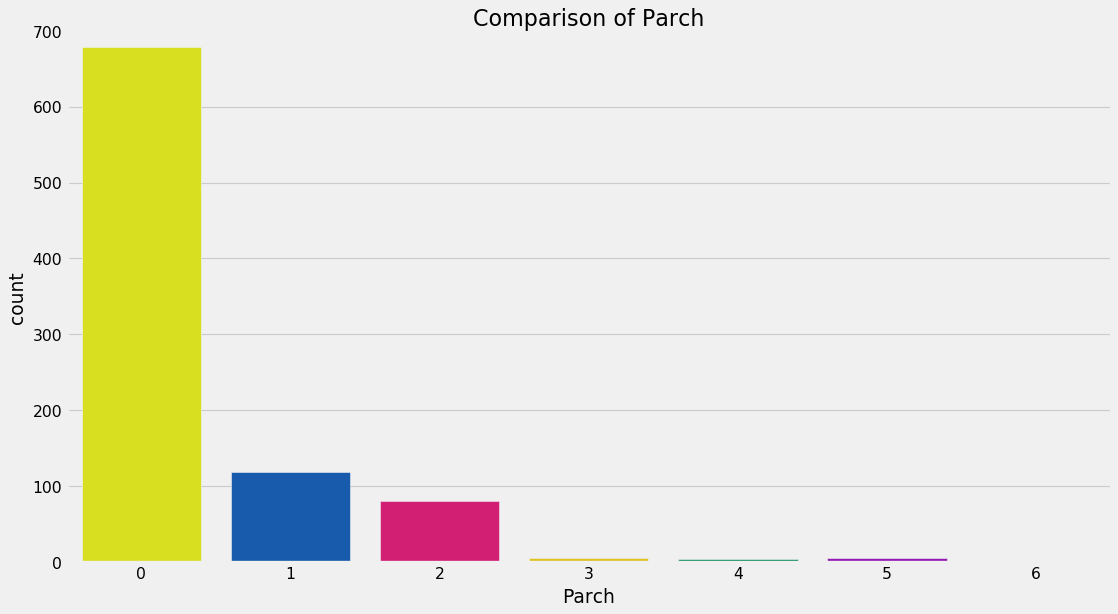

In [12]:
#Visualizing the different Parch (Number of Parents/Children Aboard)

plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('fivethirtyeight')
sns.countplot(data['Parch'], palette = 'prism')
plt.title('Comparison of Parch', fontweight = 30, fontsize = 20)
plt.xlabel('Parch')
plt.ylabel('count')
plt.show()

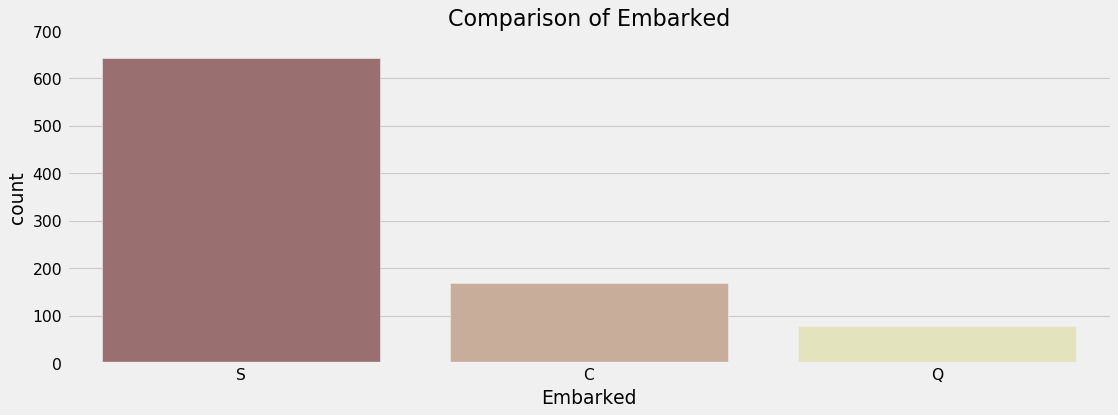

In [13]:
#Visualizing the different Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')
sns.countplot(data['Embarked'], palette = 'pink')
plt.title('Comparison of Embarked', fontweight = 30, fontsize = 20)
plt.xlabel('Embarked')
plt.ylabel('count')
plt.show()

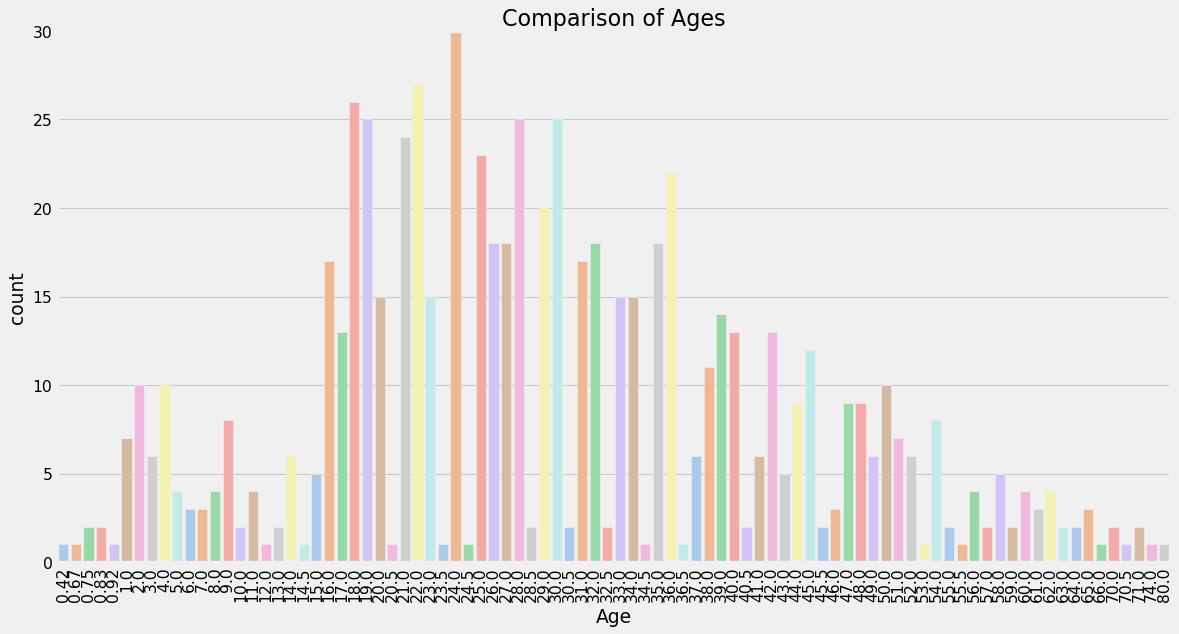

In [14]:
# visualizing Age

plt.rcParams['figure.figsize'] = (16,8)
plt.style.use('tableau-colorblind10')

sns.countplot(data['Age'], palette = 'pastel')
plt.title('Comparison of Ages', fontweight = 30, fontsize = 20)
plt.xlabel('Age')
plt.ylabel('count')
plt.xticks(rotation =90)
plt.show()

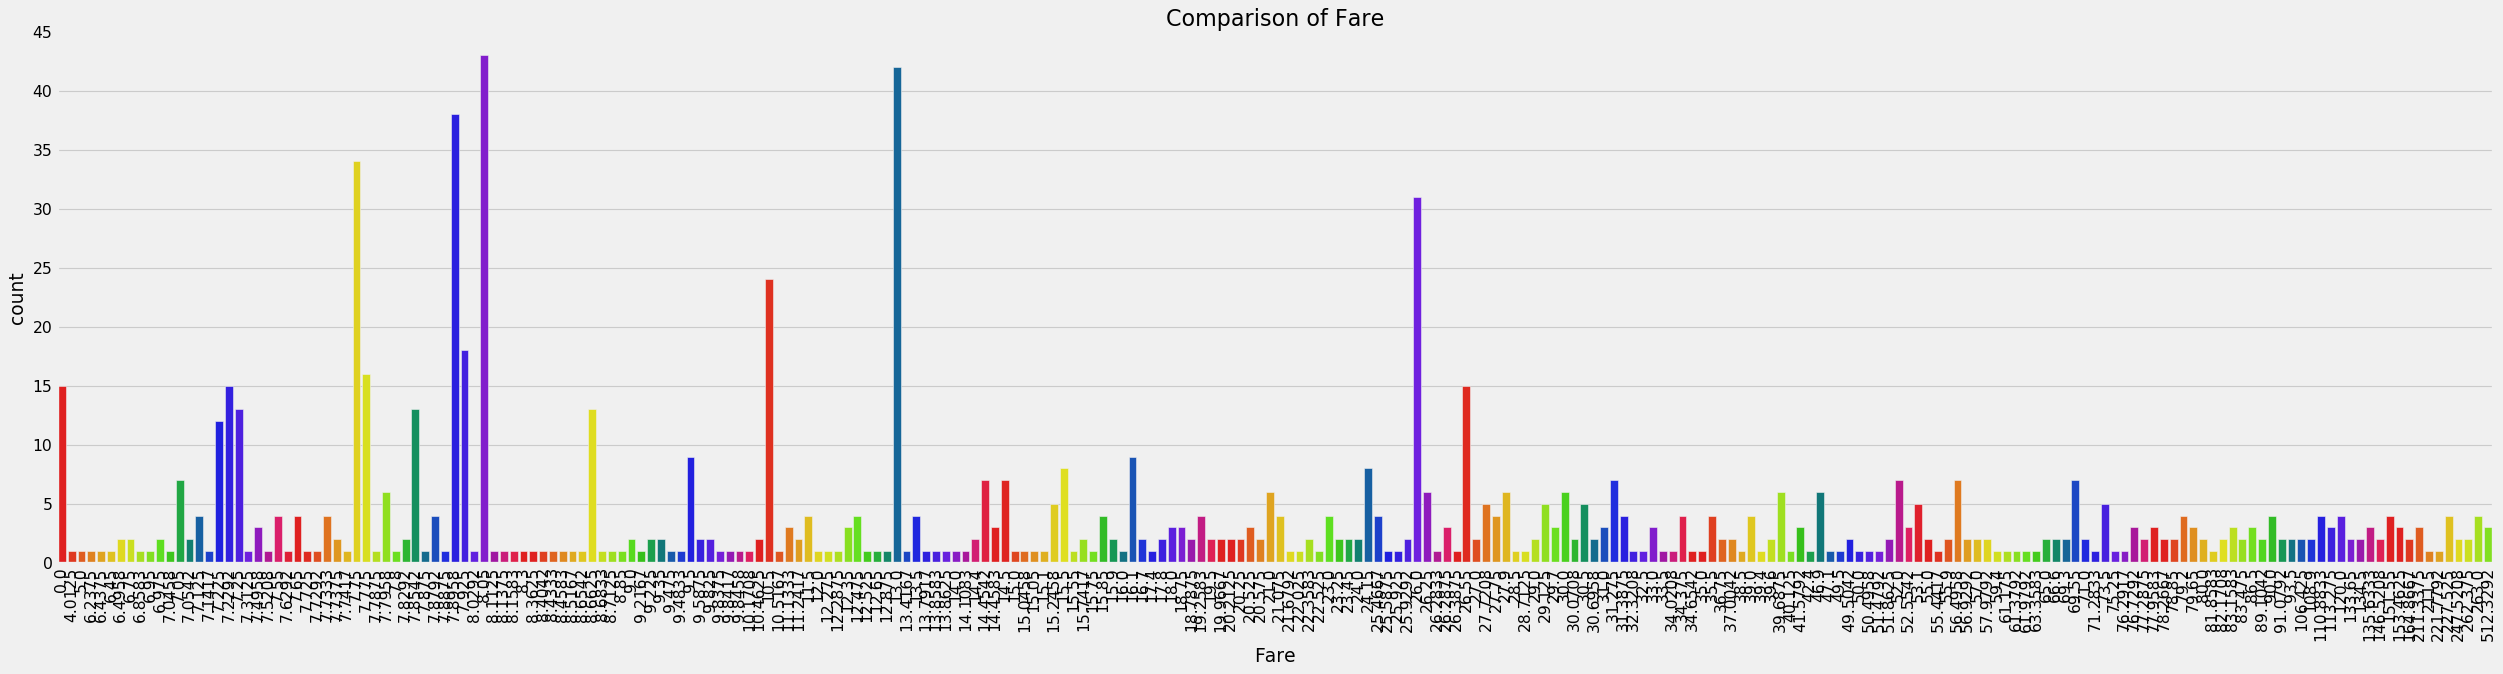

In [15]:
# visualizing Fare

plt.rcParams['figure.figsize'] = (35,8)
plt.style.use('tableau-colorblind10')

sns.countplot(data['Fare'], palette = 'prism')
plt.title('Comparison of Fare', fontweight = 30, fontsize = 20)
plt.xlabel('Fare')
plt.ylabel('count')
plt.xticks(rotation =90)
plt.show()

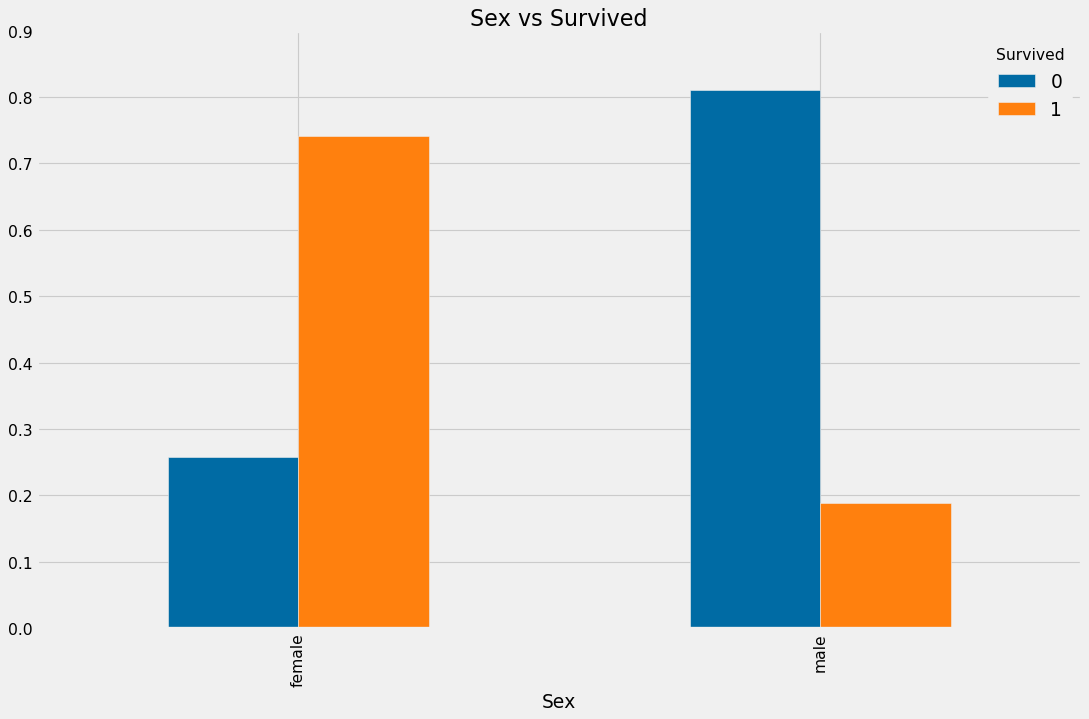

In [16]:
# Sex vs Survived

plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(data['Sex'], data['Survived'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Sex vs Survived', fontweight = 30, fontsize = 20)
plt.show()

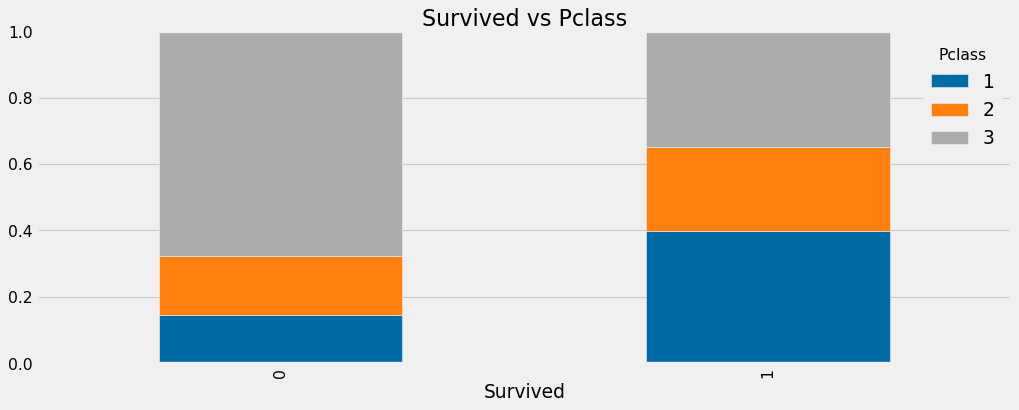

In [17]:
# comparison of Survived and Pclass

plt.rcParams['figure.figsize'] = (14, 5)
x = pd.crosstab(data['Survived'], data['Pclass'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = 'True')
plt.title('Survived vs Pclass', fontweight = 30, fontsize = 20)
plt.show()

## Data Cleaning and Preparation

In [18]:
types = dabl.detect_types(data)
types

,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
PassengerId,False,False,False,False,False,False,True
Name,False,False,False,False,False,True,False
Pclass,False,False,False,True,False,False,False
Sex,False,False,False,True,False,False,False
Age,True,False,False,False,False,False,False
SibSp,False,False,True,False,False,False,False
Parch,False,False,True,False,False,False,False
Ticket,False,False,False,False,False,True,False
Fare,True,False,False,False,False,False,False
Cabin,False,False,False,False,False,True,False


In [19]:
#Data Cleaning
half_count = len(data) / 2
data_clean = data.dropna(thresh=half_count,axis=1) # Drop any column with more than 50% missing values
data_clean = data_clean.drop(['PassengerId','Name','Ticket'],axis=1)

data_clean['Sex']=data_clean['Sex'].map({'male': 0,'female': 1})
data_clean['Embarked']=data_clean['Embarked'].map({'C': 0,'Q': 1,'S':2})
data_clean

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,22.0,1,0,7.2500,2.0,0
1,1,1,38.0,1,0,71.2833,0.0,1
2,3,1,26.0,0,0,7.9250,2.0,1
3,1,1,35.0,1,0,53.1000,2.0,1
4,3,0,35.0,0,0,8.0500,2.0,0
...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,2.0,0
887,1,1,19.0,0,0,30.0000,2.0,1
888,3,1,NaN,1,2,23.4500,2.0,0
889,1,0,26.0,0,0,30.0000,0.0,1


In [20]:
# Percentage of missing data in each column of data_clean

number_of_columns_clean = data_clean.shape[0]
percentage_of_missing_data_clean = data_clean.isnull().sum()/number_of_columns_clean
print(percentage_of_missing_data_clean)

Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Embarked    0.002245
Survived    0.000000
dtype: float64


In [21]:
#Fill in missing values with median

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

imputer.fit(data_clean)
imputer.statistics_
data_clean.median().values
X = imputer.transform(data_clean)

#Full dimension data_clean
data_clean_tr = pd.DataFrame(X, columns=data_clean.columns,index=data_clean.index)

#data_clean with columns "Pclass, Sex, Age, Fare, Survived"
data_clean_tr2 = data_clean_tr.drop(['SibSp', 'Parch','Embarked'], axis=1)
data_clean_tr2.head()

,Pclass,Sex,Age,Fare,Survived
0,3.0,0.0,22.0,7.2500,0.0
1,1.0,1.0,38.0,71.2833,1.0
2,3.0,1.0,26.0,7.9250,1.0
3,1.0,1.0,35.0,53.1000,1.0
4,3.0,0.0,35.0,8.0500,0.0


In [22]:
#Splitting the dependent and independent variables

X = data_clean_tr.iloc[:,:7]
y = data_clean_tr.iloc[:,7]

print(X.shape)
print(y.shape)

X1 = data_clean_tr2.iloc[:,:4]
y1 = data_clean_tr2.iloc[:,4]

(891, 7)
(891,)


In [23]:
#Splitting the dataset into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(712, 7)
(712,)
(179, 7)
(179,)


In [24]:
#MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

X1_train = mm.fit_transform(X1_train)
X1_test = mm.transform(X1_test)

## Modelling

#### Automatic modelling using `dabl`

In [25]:
#Build a model using full data

fc1 = dabl.SimpleClassifier(random_state=0)
X1 = data_clean.drop("Survived", axis=1)
y1 = data_clean.Survived
fc1.fit(X1, y1) 

Running DummyClassifier(strategy='prior')
accuracy: 0.616 average_precision: 0.384 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.381
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.616 average_precision: 0.384 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.381

Running GaussianNB()
accuracy: 0.410 average_precision: 0.718 roc_auc: 0.822 recall_macro: 0.519 f1_macro: 0.328
=== new best GaussianNB() (using recall_macro):
accuracy: 0.410 average_precision: 0.718 roc_auc: 0.822 recall_macro: 0.519 f1_macro: 0.328

Running MultinomialNB()
accuracy: 0.769 average_precision: 0.782 roc_auc: 0.832 recall_macro: 0.749 f1_macro: 0.752
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.769 average_precision: 0.782 roc_auc: 0.832 recall_macro: 0.749 f1_macro: 0.752

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.787 average_precision: 0.632 roc_auc: 0.767 recall_macro: 0.767 f1_macro: 0.771
=== new best DecisionTreeClas

SimpleClassifier(random_state=0, refit=True, shuffle=True, type_hints=None,
                 verbose=1)

In [26]:
#Build a model using the columns Pclass, Sex, Age, Fare

fc = dabl.SimpleClassifier(random_state=0)
X = data_clean.drop(['SibSp', 'Parch','Embarked','Survived'], axis=1)
y = data_clean.Survived
fc.fit(X, y)

Running DummyClassifier(strategy='prior')
accuracy: 0.616 average_precision: 0.384 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.381
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.616 average_precision: 0.384 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.381

Running GaussianNB()
accuracy: 0.777 average_precision: 0.768 roc_auc: 0.832 recall_macro: 0.765 f1_macro: 0.764
=== new best GaussianNB() (using recall_macro):
accuracy: 0.777 average_precision: 0.768 roc_auc: 0.832 recall_macro: 0.765 f1_macro: 0.764

Running MultinomialNB()
accuracy: 0.787 average_precision: 0.809 roc_auc: 0.840 recall_macro: 0.767 f1_macro: 0.771
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.787 average_precision: 0.809 roc_auc: 0.840 recall_macro: 0.767 f1_macro: 0.771

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.787 average_precision: 0.632 roc_auc: 0.767 recall_macro: 0.767 f1_macro: 0.771
Running DecisionTreeClassifie

SimpleClassifier(random_state=0, refit=True, shuffle=True, type_hints=None,
                 verbose=1)

### Build models using all columns

#### Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy= ' + str(accuracy_score(y_test, y_pred)))

[[95 10]
 [26 48]]
Accuracy= 0.7988826815642458


In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(tree_clf, X_train, y_train, cv=5, scoring="accuracy")

array([0.8041958 , 0.82517483, 0.78873239, 0.78873239, 0.83098592])

#### Random Forests

In [30]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier(max_depth=10, random_state=0)

RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

In [31]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy= ' + str(accuracy_score(y_test, y_pred)))

[[95 10]
 [21 53]]
Accuracy= 0.8268156424581006


### Build models using the columns Pclass, Sex, Age, Fare

#### Decision Trees

In [32]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X1_train, y1_train)
y1_pred = tree_clf.predict(X1_test)

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y1_test, y1_pred)
print(cm)
print('Accuracy= ' + str(accuracy_score(y1_test, y1_pred)))

[[95 10]
 [25 49]]
Accuracy= 0.8044692737430168


In [34]:
from sklearn.model_selection import cross_val_score
cross_val_score(tree_clf, X1_train, y1_train, cv=5, scoring="accuracy")

array([0.78321678, 0.82517483, 0.79577465, 0.79577465, 0.83098592])

#### Random Forests

In [35]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier(max_depth=10, random_state=0)

RF.fit(X1_train, y1_train)
y1_pred = RF.predict(X1_test)

In [36]:
cm = confusion_matrix(y1_test, y1_pred)
print(cm)
print('Accuracy= ' + str(accuracy_score(y1_test, y1_pred)))

[[94 11]
 [20 54]]
Accuracy= 0.8268156424581006
